# Logistic Regression -iris dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn import datasets

In [3]:
iris = datasets.load_iris()

In [4]:
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']

In [5]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
# target names are encoded as 0:setosa, 1:versicolor, 2:virginica

In [6]:
Y = iris['target']

In [7]:
dy = pd.DataFrame()

In [ ]:
dy['iris'] = Y

In [9]:
pd.value_counts(dy.iris)

2    50
1    50
0    50
Name: iris, dtype: int64

In [ ]:
# create categorical response -equal to 1 if virginica, else 0

In [21]:
dy2 = dy.copy()

In [22]:
dy2 = dy2.replace((0,1,2),(0,0,1))

In [23]:
pd.value_counts(dy2.iris)

0    100
1     50
Name: iris, dtype: int64

In [10]:
# predictors (exogenous variables)

In [11]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [12]:
X = iris['data']

In [13]:
X[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [14]:
# one feature: petal width

In [27]:
X = iris['data'][:,3:]
X[:5]

array([[0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.2]])

In [ ]:
# target as numpy array

In [43]:
y = dy2.values

In [44]:
y.shape

(150, 1)

In [45]:
# convert array to a vector

In [46]:
y = y.ravel()

In [47]:
y.shape

(150,)

In [32]:
# fit model

In [48]:
log_reg = LogisticRegression(solver='lbfgs',random_state = 42)

In [49]:
log_reg.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=42, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [50]:
X_new = np.linspace(0,3,1000).reshape(-1,1)

In [51]:
y_proba = log_reg.predict_proba(X_new)

In [52]:
# plot

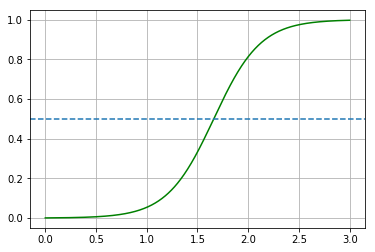

In [53]:
plt.plot(X_new,y_proba[:,1],'g-')
plt.axhline(y=0.5,ls='--')
plt.grid()

In [33]:
# x-coordinate where curve exceeds 0.50

In [54]:
x1 = X_new[y_proba[:,1] >= 0.50]

In [55]:
x1[:5]

array([[1.66066066],
       [1.66366366],
       [1.66666667],
       [1.66966967],
       [1.67267267]])

In [56]:
boundary = x1[0]

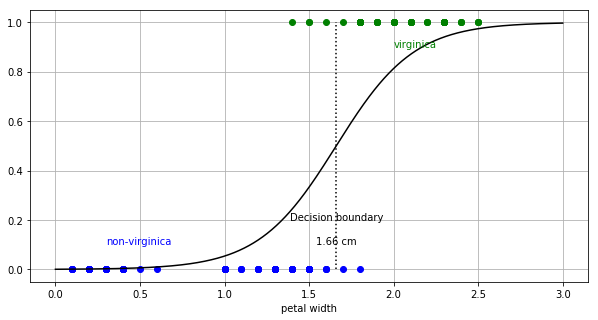

In [59]:
plt.figure(figsize = (10,5))

# plot non-virginica
plt.plot(X[y==0], y[y==0], 'bo')

# plot virginica
plt.plot(X[y==1], y[y==1], 'go')

# plot fitted curve
plt.plot(X_new,y_proba[:,1],'k')

# plot decision boundary
plt.plot([boundary,boundary],[0,1],'k:')
plt.text(boundary,0.2,'Decision boundary',color='k',ha = 'center')
plt.text(boundary,0.1,'1.66 cm',color='k',ha = 'center')

plt.text(2,0.9,'virginica',color='g')
plt.text(0.3,0.1,'non-virginica',color = 'b')

plt.xlabel('petal width')
plt.grid()

In [ ]:
# Decision boundary predicts virginica species if petal width > 1.66 cm

## two features -petal length, petal width

In [45]:
X = iris['data'][:,(2,3)]

In [46]:
X[:3]

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2]])

In [47]:
log_reg = LogisticRegression(solver='lbfgs',C=10,random_state=42)

In [48]:
log_reg.fit(X,y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=42, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [49]:
log_reg.intercept_

array([-31.06624834])

In [50]:
log_reg.intercept_[0]

-31.066248342933537

In [51]:
log_reg.coef_

array([[4.42142146, 5.74004612]])

In [53]:
log_reg.coef_[0][0]

4.421421464675028

In [54]:
# boundary x-coordinates

In [55]:
xvalues = np.array([2,7])

In [56]:
# boundary y-coordinates

In [57]:
b0 = log_reg.intercept_[0]

In [60]:
b1 = log_reg.coef_[0][0]

In [61]:
b2 = log_reg.coef_[0][1]

In [62]:
boundary = -(b0+b1*xvalues) / b2

In [63]:
boundary

array([3.87164231, 0.02026083])

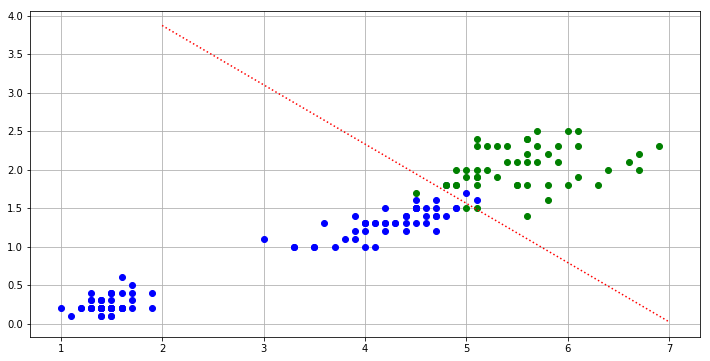

In [64]:
plt.figure(figsize=(12,6))
plt.plot(X[y==0,0],X[y==0,1], 'bo')
plt.plot(X[y==1,0],X[y==1,1], 'go')
plt.plot(xvalues,boundary,'r:')
plt.grid()
